
**Shortcomings of decision trees**

- They overfit
- They are structurally unstable since we need to find the optimal hyper-parameters in order to interpret the result

Therefore, by using a greater number of Trees a.k.a a "Forest", is 1 way of getting a better fitting model and prediction

### Bagging & Random Forest

---
Bagging :

Boostrap Aggregation is called Bagging

It's Ensemble Meta-Algorithm

Used for improving the stability and accuray of ML algorithms

It can be used in both Regression & Classification techniques

In bagging, a random subset of the training data is selected to train each tree

Furthermore, the model randomly restricts the variables which may be used at the splits of each tree. Hence, the trees grown are dissimilar, but they still retain certain predictive power.


### Example - People's first preference of Entertainment

https://github.com/dphi-official/ML_Models/blob/master/Model_Optimisation/notebooks/random_forest_slides.ipynb

**build a Random Forest Classifier in Python**

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data & separating it into train and test
# Splitting the data into training and target set

dataframe = pd.read_csv('loan_prediction.csv')
dataframe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [3]:
# Splitting into input and target variable
# Here, target = Credit_History
y = dataframe[['Credit_History']]
X = dataframe.drop(['Credit_History', 'Loan_Status'], axis=1)

np.random.seed(9)
# splitting into train and test set            
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

creating 2 Random Forest models with different parameters

One with min_samples_leaf set to 2

One with max_depth set to 5

In [4]:
#model for tuning the min samples of leaf
clf_1 = RandomForestClassifier(min_samples_leaf=2, random_state=9)
clf_1.fit(X_train,y_train)

#model for tuning the max depth
clf_2 = RandomForestClassifier(max_depth = 5, random_state=9)
clf_2.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=9)

In [5]:
# predicting for min_samples 0f leaf as 2.
y_clf_1 = clf_1.predict(X_test)

# predicting for max depth 5.
y_clf_2 = clf_2.predict(X_test)

In [6]:
#calculate accuracy and roc auc score for min leaf samples

accuracy_clf_1 = accuracy_score(y_test, y_clf_1)
auc_roc1 = roc_auc_score(y_test, y_clf_1)
print("Accuracy score of the model with min sample leaf 2 is: {}".format(accuracy_clf_1))
print("roc_auc_score of the model1 is: {}".format(auc_roc1))

print("\n")

#calculate accuracy and roc auc score for max depth 5

accuracy_clf_2 = accuracy_score(y_test,y_clf_2)
auc_roc2 = roc_auc_score(y_test, y_clf_2)
print("Accuracy score of the model with max depth 5 is: {}".format(accuracy_clf_2))
print("roc_auc_score of the model2 is: {}".format(auc_roc2))

Accuracy score of the model with min sample leaf 2 is: 0.7297297297297297
roc_auc_score of the model1 is: 0.4891304347826087


Accuracy score of the model with max depth 5 is: 0.745945945945946
roc_auc_score of the model2 is: 0.5


The main weaknesses of using a random forest are:


They're difficult to interpret

Because we've averaging the results of many trees, it can be hard to figure out why a random forest is making predictions the way it is.

They take longer to create - Making two trees takes twice as long as making one, making three takes three times as long, and so on(But with compute no longer an issue).


turned through tuning these hyperparameters through a process : Grid Searching

Hyper parameter tuning


Tweaking parameters can increase the accuracy of the forest.

These parameters apply to the individual trees in the model, and change how they are constructed

In [ ]:
'''
 parameter = {
            'n_estimators': [ ], 
              'max_features': [], 
              'criterion': [],
              'max_depth': ,
              'min_samples_split': [ ],
              'min_samples_leaf': [ ] 
           }  
'''

In [7]:
# Defined a custom function for implementing hyper parameter tuning
def gridfunc(classifier, parameter, X_train, y_train):
        
    clf = classifier
    np.random.seed(9)
    parameters = parameter
    acc_scorer = make_scorer(accuracy_score)
    
    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, return_train_score=True)
    grid_obj = grid_obj.fit(X_train, y_train) 
    
    return grid_obj

In [10]:
#function for plotting mean scores for a particular grid object

def hp_cv_scores(grid_obj):
    grid_obj.cv_results_  #A dictionary with keys as column title and values as columns
    mean_test_scores = grid_obj.cv_results_['mean_test_score'] #Adding 'mean_test_score' as a key
    mean_train_scores = grid_obj.cv_results_['mean_train_score'] #Adding 'mean_train_score' as a key
    
    plt.figure(figsize=(10,6))
    
    # the below lines just fill up the column using the various parameter values we want to try
    all_vals = list(grid_obj.param_grid.values()) #all_vals will be a list of lists
    param_values =[str(x) for x in all_vals[0]] # param_values will be a list of strings
    
    # The below line creates values for ticks on x axis. If there are 2 parameter values to be tried, it'll create 2 ticks
    x = np.arange(1, len(param_values)+1)
     
    plt.plot(x,mean_train_scores, c='r', label='Train set') #Plotting the mean_train_scores in red
    
    plt.xticks(x,param_values)
    
    plt.plot(x,mean_test_scores,c='g', label='Test set') #Plotting the mean_test_scores in red
    plt.xlabel(list(grid_obj.param_grid.keys())[0]) #Label of the column will be the hyperparameter
    plt.ylabel('mean scores')
    plt.legend()
    plt.show()

In [8]:
classifier = RandomForestClassifier(random_state=9)

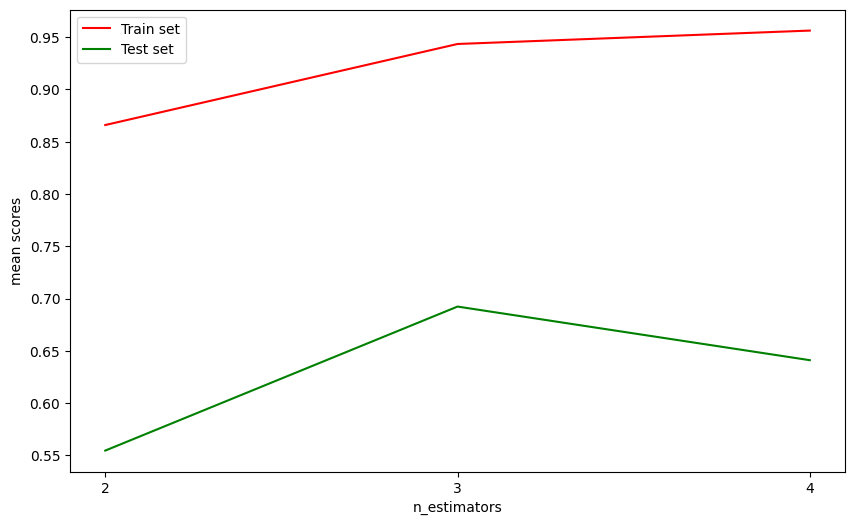

In [11]:
# plotting the graph using created function to find the variation in model for given n_estimators -- NEEDS LEGEND

grid = gridfunc(classifier,{'n_estimators': [2, 3, 4]} , X_train, y_train)
hp_cv_scores(grid)

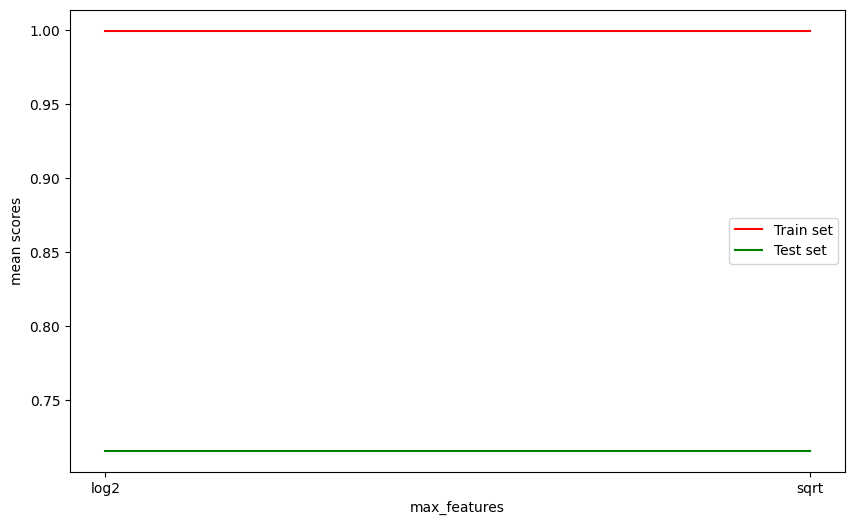

In [12]:
# plotting the graph to find the variation in model for given max features

grid = gridfunc(classifier,{'max_features': ['log2', 'sqrt']} , X_train, y_train)
hp_cv_scores(grid)

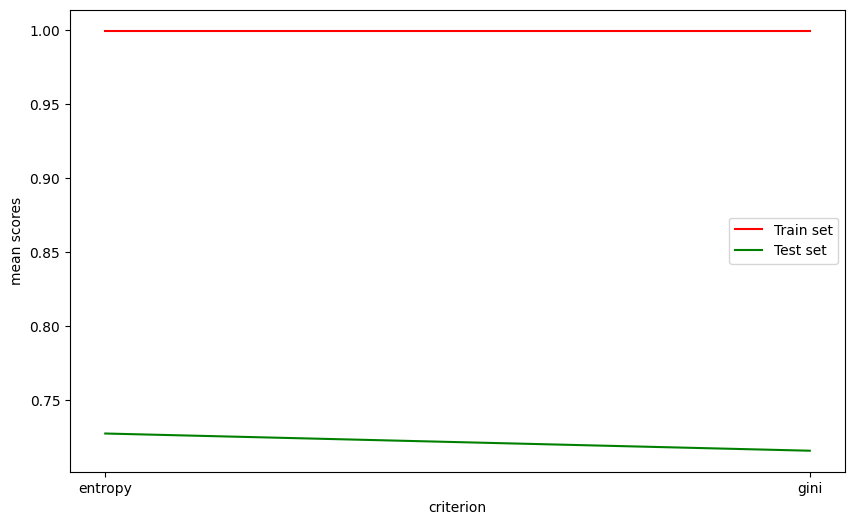

In [13]:
# plotting the graph to find the variation in model for given criterion

grid = gridfunc(classifier,{'criterion': ['entropy', 'gini']} , X_train, y_train)
hp_cv_scores(grid)

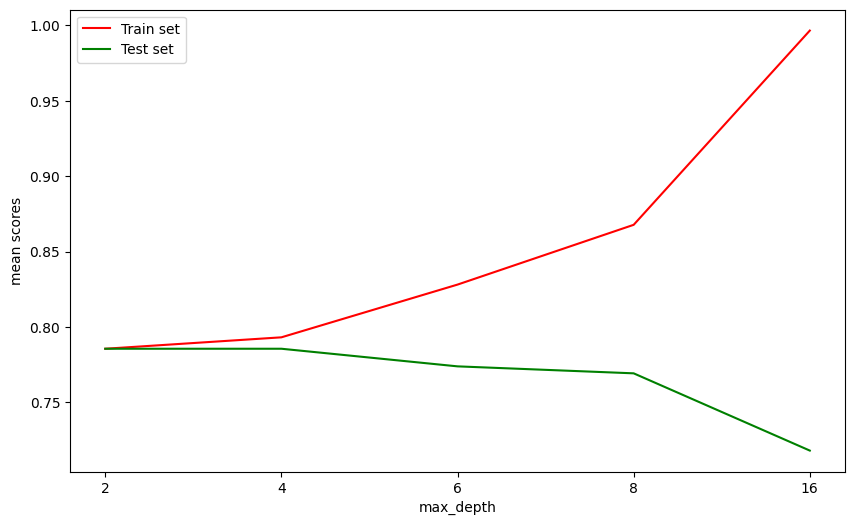

In [14]:
# plotting the graph to find the variation in model for given max depth

grid = gridfunc(classifier,{'max_depth': [2,4,6,8,16]} , X_train, y_train)
hp_cv_scores(grid)

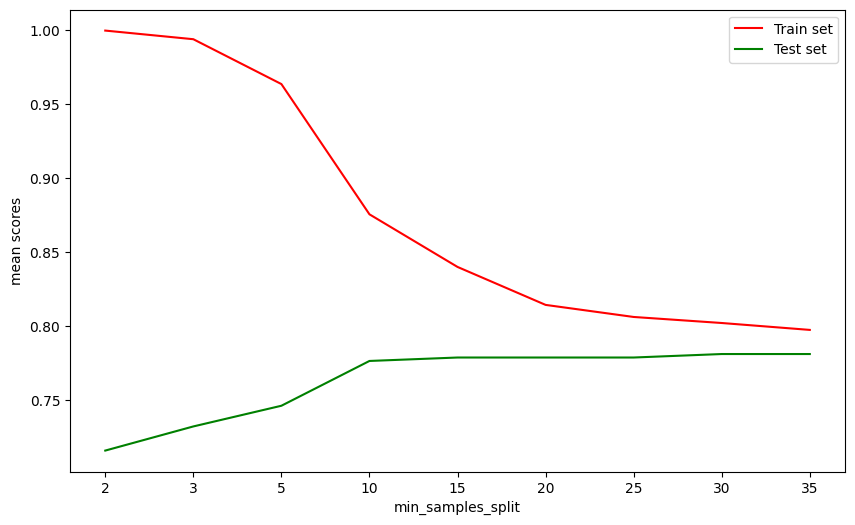

In [15]:
# plotting the graph to find the variation in model for given min samples split

grid = gridfunc(classifier,{'min_samples_split': [2, 3, 5, 10, 15,20,25,30,35]} , X_train, y_train)
hp_cv_scores(grid)

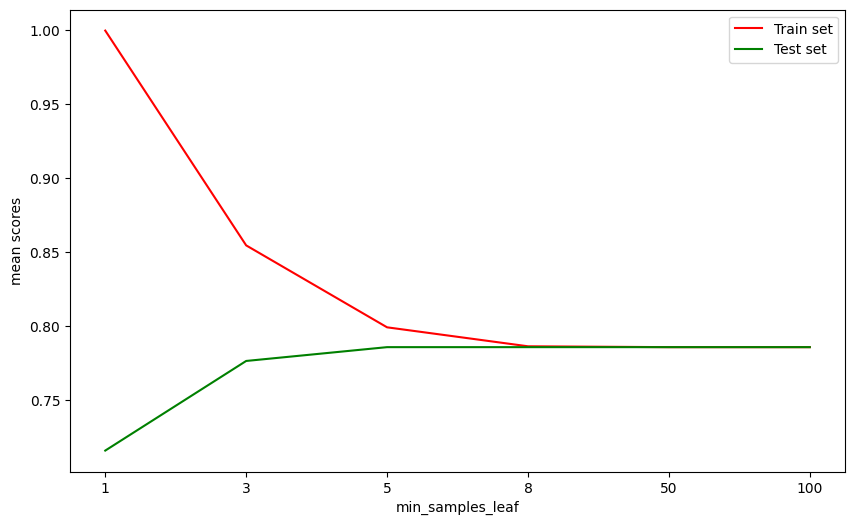

In [16]:
# plotting the graph to find the variation in model for given min samples leaf

grid = gridfunc(classifier,{'min_samples_leaf': [1,3,5,8,50,100]} , X_train, y_train)
hp_cv_scores(grid)

This code is using a grid search method to find the best hyperparameters for the RandomForestClassifier.

gridfunc is a function that performs grid search on the classifier, using the specified parameters and training data. It takes three arguments: the classifier, a dictionary of parameters to search over, and the training data (X_train and y_train). In this case, it is searching over the min_samples_leaf parameter with the values of [1,3,5,8,50,100]

hp_cv_scores(grid) is a function that takes the output of the grid search, which is the grid object, and returns the cross-validated scores for the hyperparameters found by the grid search.

In [17]:
classifier = RandomForestClassifier(random_state=9)
parameter = {'n_estimators': [10,50,100], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,4,6], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,3,5]
             }

This code creates an instance of the RandomForestClassifier class with a random state of 9, and sets up a dictionary of parameters for the classifier. The n_estimators parameter controls the number of trees in the forest, and can take the values of 10, 50, or 100. The max_features parameter controls the number of features considered for splitting at each node and can take the value of 'log2' or 'sqrt'. The criterion parameter controls the function to measure the quality of a split and can take the value of 'entropy' or 'gini'. The max_depth parameter controls the maximum depth of the tree, and can take the values 2, 4, or 6. The min_samples_split parameter controls the minimum number of samples required to split an internal node, and can take the values of 2, 3, or 5. Lastly, the min_samples_leaf parameter controls the minimum number of samples required to be at a leaf node, and can take the values of 1, 3, or 5.

**The below code will create a Grid Object and train it.** It might take a lot of time for the process to complete

In [18]:
#task find the results for the given params
grid = gridfunc(classifier, parameter, X_train, y_train)

In [19]:
# Set the clf to the best combination of parameters
clf = grid.best_estimator_
    
# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=3,
                       n_estimators=10, random_state=9)

We have the best possible parameters for our model using GridSearch now


Random Forest is a bagging algorithm with decision tree as base classifier/regressor\
The Random Forest algorithm introduces extra randomness when growing trees\
Instead of searching for the very best feature when splitting a node it searches for the best feature among a random subset of features.\
This results in a greater tree diversity, which trades a higher bias for a lower variance, generally yielding an overall better model.\
Random Forests can be easily deployed in a distributed fashion due to the fact that they can run in parallel and for imbalanced data Random Forest stratifys the sampling.\
And it is true that they are more robust to overfitting and require less tuning to avoid it.

In [20]:
# a sample workflow for using the RandomForestClassifier in Python:



# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
y = dataframe[['Credit_History']]
X = dataframe.drop(['Credit_History', 'Loan_Status'], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 3, 5]
}

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)

# Use the best parameters to train the model on the entire training set
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_clf.predict(X_test)

# Print the test accuracy and confusion matrix
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.7759637188208617
0.7642276422764228
[[ 0 29]
 [ 0 94]]


This is a basic workflow for using the RandomForestClassifier in Python. The code loads the data, splits it into training and test sets, defines a parameter grid for grid search, initializes the classifier, performs grid search to find the best hyperparameters, and then trains the model on the entire training set using the best parameters found. Finally, it uses the trained model to make predictions on the test set and evaluate its performance using the accuracy score and confusion matrix.

there are various ways to visualize the predictions made by a Random Forest classifier. Here are a few examples:

**Confusion Matrix**: A confusion matrix is a table that is used to define the performance of a classification algorithm. It is a matrix that is used to define the performance of a classification algorithm. It is a table with two dimensions, where the rows are the actual values, and the columns are the predicted values.

**ROC Curve**: A ROC curve is a graphical representation of the performance of a binary classifier. It shows the trade-off between the true positive rate and the false positive rate.

**Precision-Recall Curve**: A precision-recall curve is a graphical representation of the performance of a binary classifier. It shows the trade-off between the precision and recall.

**Feature Importance**: Random Forest classifiers have a feature_importances_ attribute that can be used to determine the importance of each feature in the dataset. The feature importances can be visualized using a bar plot or a feature importance plot.

These are just a few examples of visualizations that can be used to evaluate the predictions made by a Random Forest classifier. The choice of visualization depends on the characteristics of the data and the specific problem you are trying to solve.

Text(0.5, 0, 'Predicted label')

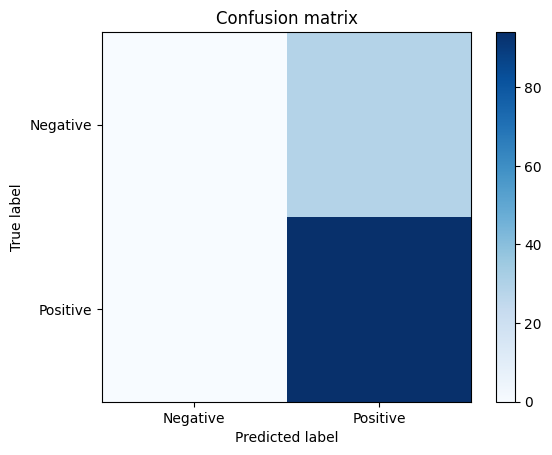

In [21]:
# Import the necessary libraries
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Compute the confusion matrix
y_pred = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks(np.arange(2), ['Negative', 'Positive'])
plt.yticks(np.arange(2), ['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

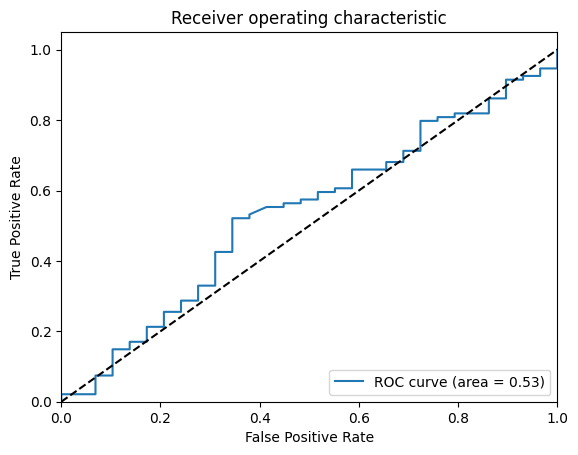

In [22]:
# Compute the ROC curve and AUC
y_pred_proba = best_clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

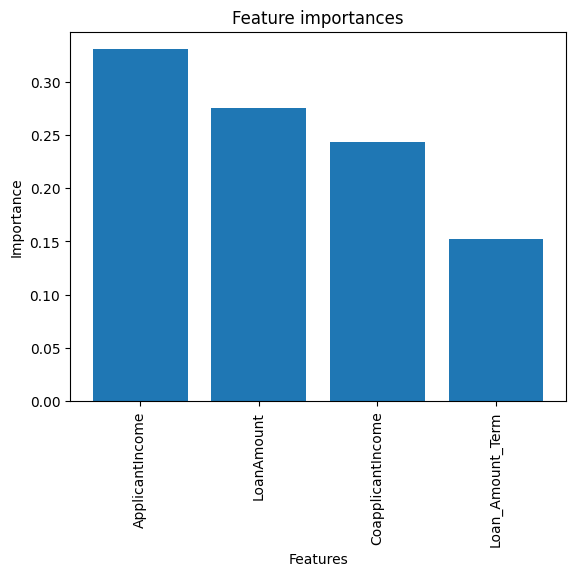

In [23]:
# Plot feature importances
importances = best_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.bar(range(X_train.shape[1]), importances[indices])
plt.title("Feature importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()